# Simple linear regression ony with one variable

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### Creating Class

In [5]:
class SimpleLinearRegression:
    def __init__(self, dataset, NameofIndependentVar, NameofDependentVar, split_fraction = None ):
        if split_fraction is None:
            split_fraction = 0.2 
        self.split_fraction = split_fraction
        self.dataset = dataset
        self.NameofIndependentVar = NameofIndependentVar
        self.NameofDependentVar = NameofDependentVar
        
    def test(self):
        # load and describe data
        dataset_n  =  pd.read_csv(self.dataset)
        print("Shape of Dataset   ---> " , str(dataset_n.shape) + "\n\n\n" )
        print("Describe the Dataset   ---> " + "\n")
        print(dataset_n.describe())
        Var_X = self.NameofIndependentVar
        Var_Y = self.NameofDependentVar
        
        # Plot data Independent vs Dependent variable
        print("\n\n\n")
        print("Plot of independent vs dependent varialble   ---> ")
        dataset_n.plot(x=Var_X, y=Var_Y, style='o')  
        plt.title(Var_X + "vs" +  Var_Y)  
        plt.xlabel(Var_X)  
        plt.ylabel(Var_Y)  
        plt.show()
        
        #Histogram plot of dependent variable
        plt.figure(figsize=(15,10))
        plt.tight_layout()
        seabornInstance.distplot(dataset_n[Var_Y])
        
        # Splitting independent and dependent variable
        X = dataset_n[Var_X].values.reshape(-1,1)
        y = dataset_n[Var_Y].values.reshape(-1,1)
        
        # Splitting into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.split_fraction, random_state=0)
        print("\n\n\n")
        print("Shape of training data   ---> ",str(X_train.shape))
        print("Shape of test data   ---> ",str(X_test.shape))
        
        #Fitting the train data
        regressor = LinearRegression()  
        regressor.fit(X_train, y_train) #training the algorithm
        
        #Check the coefficient and slope of result
        print("\n\n\n")
        print("Value of slope and Intercept   ---> " + "\n")
        #To retrieve the intercept:
        print(regressor.intercept_)
        #For retrieving the slope:
        print(regressor.coef_)
        
        #Prediction of result
        y_pred = regressor.predict(X_test)
        
        # Creating dataframe of test and predicted value
        df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
        print("\n\n\n")
        print("Value of test and predicted data   ---> "+"\n")
        print(df)
        print("\n\n\n")
        # Plot first few predicted and test values
        print("Compare graph of histogram of dependent variable and first few test vs predicted value   ---> "+ "\n")
        df1 = df.head(25)
        df1.plot(kind='bar',figsize=(16,10))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        print("\n\n\n")
  
        # Plotting the predicted line
        print("Plot the predicted fitting line   ---> ")
        plt.scatter(X_test, y_test,  color='gray')
        plt.plot(X_test, y_pred, color='red', linewidth=2)
        plt.show()
        print("\n\n\n")
        
        # Calculating the metric
        print("The value of different Errors   ---> "+"\n")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        
    

#### Input of class

SimpleLinearRegression('file_location.csv','IndependentVariable','DependentVariable',test_train_split)


Note - The dataset file should be in .csv format and it should be a cleaned dataset(Categorical data should be pre-processed)

In [6]:
cl = SimpleLinearRegression('salary_data.csv','YearsExperience' , 'Salary', 0.5 )

Shape of Dataset   --->  (30, 2)



Describe the Dataset   ---> 

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000




Plot of independent vs dependent varialble   ---> 


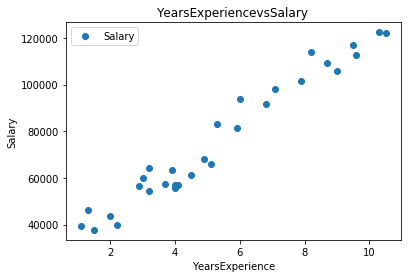





Shape of training data   --->  (15, 1)
Shape of test data   --->  (15, 1)




Value of slope and Intercept   ---> 

[27275.400978]
[[9183.59243748]]




Value of test and predicted data   ---> 

    Actual      Predicted
0    37731   41050.789634
1   122391  121866.403084
2    57081   64928.129972
3    63218   63091.411484
4   116969  114519.529134
5   109431  107172.655184
6   112635  115437.888378
7    55794   64009.770728
8    83088   75948.440897
9   101302   99825.781234
10   56642   53907.819047
11   66029   74111.722409
12   64445   56662.896778
13   61111   68601.566947
14  113812  102580.858965




Compare graph of histogram of dependent variable and first few test vs predicted value   ---> 



C:\Users\boltuzamaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


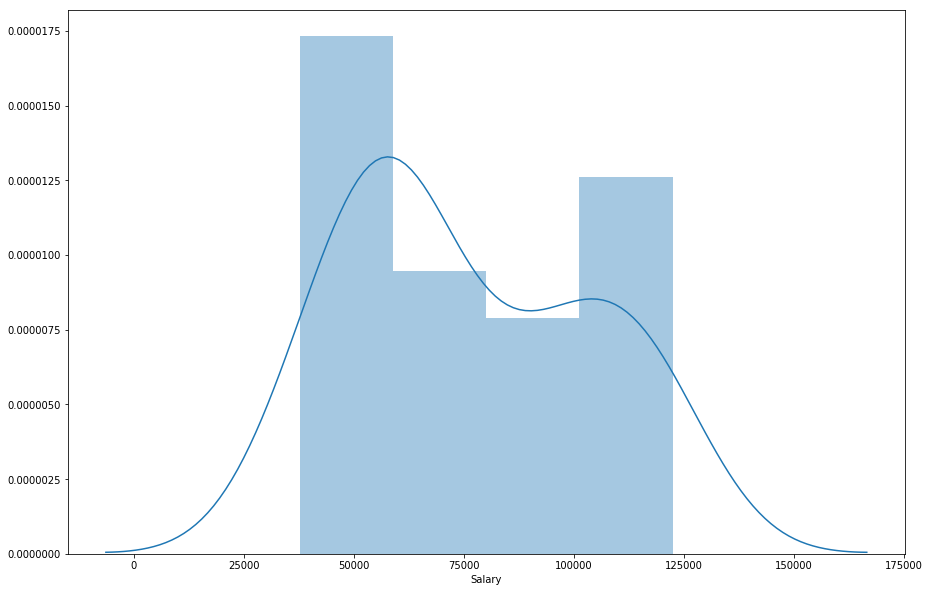

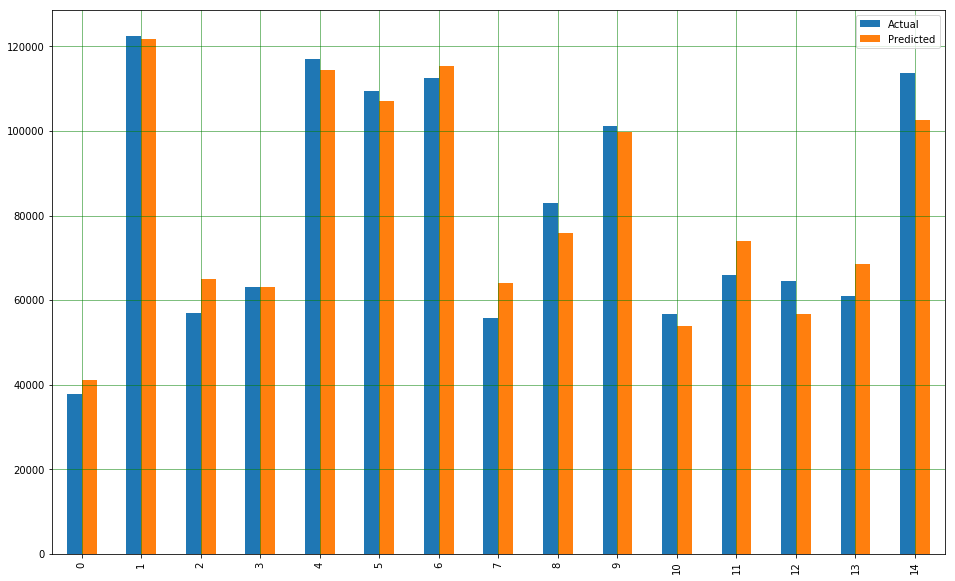





Plot the predicted fitting line   ---> 


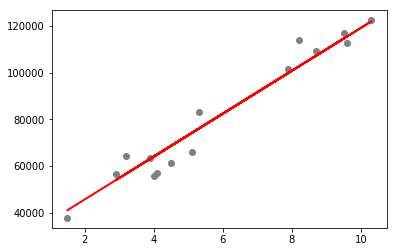





The value of different Errors   ---> 

Mean Absolute Error: 4898.738150685481
Mean Squared Error: 35207447.00483354
Root Mean Squared Error: 5933.586352690381


In [7]:
cl.test()